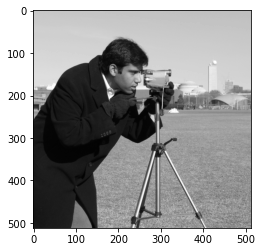

In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 4
# @Ahmet Galip Sengun - 904261
# November 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = skimage.data.camera()

plt.imshow(img, cmap="gray")

# Task 1

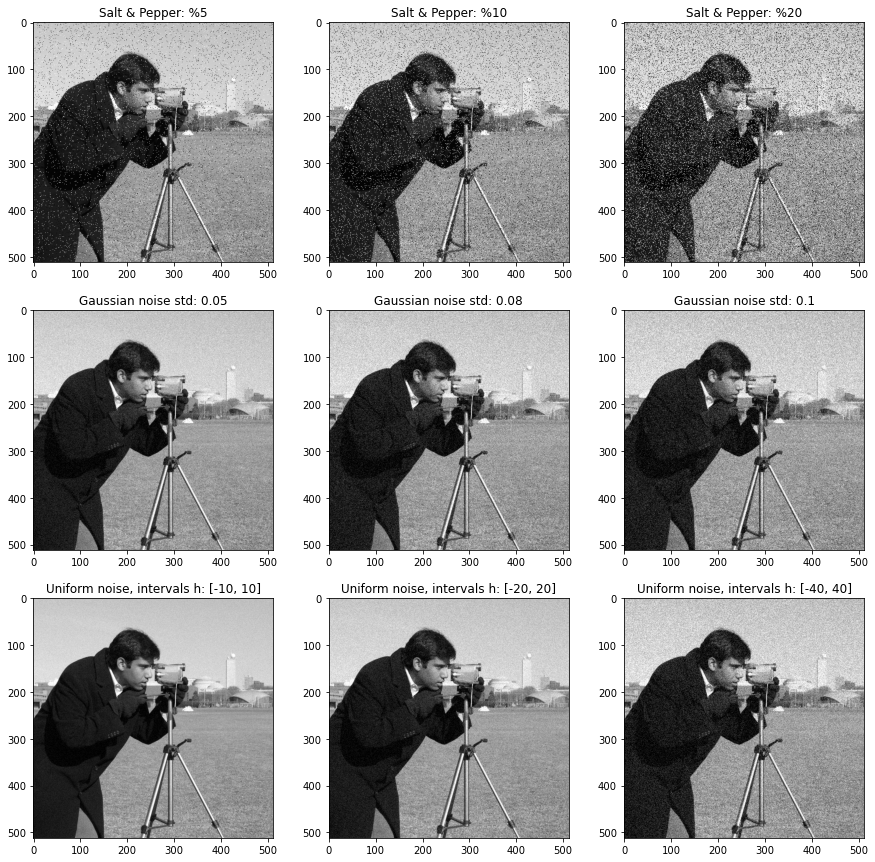

In [2]:
fig, ax = plt.subplots(3, 3, figsize = (15,15))

percentage = 0.05
ax[0, 0].set_title(f"Salt & Pepper: %{int(percentage * 100)}")
sp5 = skimage.img_as_ubyte(skimage.util.random_noise(img, 's&p', amount = percentage))
ax[0, 0].imshow(sp5, cmap="gray")

percentage = 0.1
ax[0, 1].set_title(f"Salt & Pepper: %{int(percentage * 100)}")
sp10 = skimage.img_as_ubyte(skimage.util.random_noise(img, 's&p', amount = percentage))
ax[0, 1].imshow(sp10, cmap="gray")

percentage = 0.2
ax[0, 2].set_title(f"Salt & Pepper: %{int(percentage * 100)}")
sp20 = skimage.img_as_ubyte(skimage.util.random_noise(img, 's&p', amount = percentage))
ax[0, 2].imshow(sp20, cmap="gray")

s = 0.05
GN05 = skimage.img_as_ubyte(skimage.util.random_noise(img, var = s * s))
ax[1, 0].set_title(f"Gaussian noise std: {s}")
ax[1, 0].imshow(GN05, cmap="gray")

s = 0.08
GN08 = skimage.img_as_ubyte(skimage.util.random_noise(img, var = s * s))
ax[1, 1].set_title(f"Gaussian noise std: {s}")
ax[1, 1].imshow(GN08, cmap="gray")

s = 0.1
GN10 = skimage.img_as_ubyte(skimage.util.random_noise(img, var = s * s))
ax[1, 2].set_title(f"Gaussian noise std: {s}")
ax[1, 2].imshow(GN10, cmap="gray")

h = 10
ax[2, 0].set_title(f"Uniform noise, intervals h: [{-h}, {h}]")
msk = np.random.uniform(-h, h, img.shape)
img_ = img.astype(np.int32)
uni10 = np.clip(img_ + msk, 0, 255).astype(np.uint8)
ax[2, 0].imshow(uni10, cmap="gray")

h = 20
ax[2, 1].set_title(f"Uniform noise, intervals h: [{-h}, {h}]")
msk = np.random.uniform(-h, h, img.shape)
img_ = img.astype(np.int32)
uni20 = np.clip(img_ + msk, 0, 255).astype(np.uint8)
ax[2, 1].imshow(uni20, cmap="gray")

h = 40
ax[2, 2].set_title(f"Uniform noise, intervals h: [{-h}, {h}]")
msk = np.random.uniform(-h, h, img.shape)
img_ = img.astype(np.int32)
uni40 = np.clip(img_ + msk, 0, 255).astype(np.uint8)
ax[2, 2].imshow(uni40, cmap="gray")

In [3]:
def nmse(img1, img2):
    img1, img2 = img1.astype(np.float64), img2.astype(np.float64)
    
    return np.sum(np.square(img1 - img2)) / np.sum(np.square(img1))

In [4]:
import pandas as pd
df = pd.DataFrame(columns=("Noise type and its amount", "NMSE(orig, noised)"))

img_dict = {"Salt and pepper 5%"     : sp5, 
            "Salt and pepper 10%"    : sp10, 
            "Salt and pepper 20%"    : sp20, 
            "Gaussian std 0.05"      : GN05, 
            "Gaussian std 0.08"      : GN08, 
            "Gaussian std 0.1"       : GN10, 
            "Uniform noise [-10, 10]": uni10, 
            "Uniform noise [-20, 20]": uni20, 
            "Uniform noise [-40, 40]": uni40}

for key in img_dict.keys():
    err = nmse(img, img_dict[key])
    df_new_row = pd.DataFrame({"Noise type and its amount": [key],
                               "NMSE(orig, noised)": [err]})
    df = pd.concat([df, df_new_row], ignore_index=True)

df

,Noise type and its amount,"NMSE(orig, noised)"
0,Salt and pepper 5%,0.049426
1,Salt and pepper 10%,0.098291
2,Salt and pepper 20%,0.197052
3,Gaussian std 0.05,0.007139
4,Gaussian std 0.08,0.017631
5,Gaussian std 0.1,0.026692
6,"Uniform noise [-10, 10]",0.001502
7,"Uniform noise [-20, 20]",0.005911
8,"Uniform noise [-40, 40]",0.022635


# TASK 2

In [5]:
def median_filter(img, footprint):
    filt = skimage.filters.median(img, footprint)
    return filt

def mean_filter(img, footprint):
    filt = skimage.filters.rank.mean(img, footprint)
    return filt

In [6]:
from skimage.util import img_as_ubyte
def gaussian_filter(img, sigma):
    
    #filt = skimage.filters.gaussian(img, sigma=sigma, preserve_range=True)
    filt = skimage.filters.gaussian(img, sigma=sigma)
    filt = img_as_ubyte(filt)
    return filt

In [7]:
from skimage.morphology import disk, square

def filter_ ():
    df2 = pd.DataFrame()
    
    footprints = {"disk(1)"  : disk(1), 
                  "disk(2)"  : disk(2), 
                  "square(3)": square(3)}
    
    sigmas = [0.5, 0.75, 1]
    
    for key in img_dict.keys():
    
        #median
        for footprint in footprints.keys():
            
            filtered = median_filter(img_dict[key], footprints[footprint])
            filtered_nmse = nmse(img, filtered)
        
            df_new_row = pd.DataFrame({"Noise type and its amount": [key],
                                       "NMSE(orig, denoised)" : filtered_nmse,
                                       "filter type": "median",
                                       "Filter param(s)": footprint})
            df2 = pd.concat([df2, df_new_row], ignore_index=True)
            
        #mean
        for footprint in footprints.keys():
            filtered = mean_filter(img_dict[key], footprints[footprint])
            filtered_nmse = nmse(img, filtered)
        
            df_new_row = pd.DataFrame({"Noise type and its amount": [key],
                                       "NMSE(orig, denoised)" : filtered_nmse,
                                       "filter type": "mean",
                                       "Filter param(s)": footprint})
            df2 = pd.concat([df2, df_new_row], ignore_index=True)
            
        #gaussian
        for sigma in sigmas:
            filtered = gaussian_filter(img_dict[key], sigma)
            filtered_nmse = nmse(img, filtered)
            df_new_row = pd.DataFrame({"Noise type and its amount": [key],
                                       "NMSE(orig, denoised)" : filtered_nmse,
                                       "filter type": "gaussian",
                                       "Filter param(s)": sigma})
            df2 = pd.concat([df2, df_new_row], ignore_index=True)
            
            
    return df2
filter_()

,Noise type and its amount,"NMSE(orig, denoised)",filter type,Filter param(s)
0,Salt and pepper 5%,0.002219,median,disk(1)
1,Salt and pepper 5%,0.003171,median,disk(2)
2,Salt and pepper 5%,0.002865,median,square(3)
3,Salt and pepper 5%,0.012586,mean,disk(1)
4,Salt and pepper 5%,0.008689,mean,disk(2)
...,...,...,...,...
76,"Uniform noise [-40, 40]",0.006013,mean,disk(2)
77,"Uniform noise [-40, 40]",0.006046,mean,square(3)
78,"Uniform noise [-40, 40]",0.009923,gaussian,0.5
79,"Uniform noise [-40, 40]",0.005413,gaussian,0.75


In [8]:
df2 = filter_()
combined_df = pd.merge(df, df2, on='Noise type and its amount')
combined_df

,Noise type and its amount,"NMSE(orig, noised)","NMSE(orig, denoised)",filter type,Filter param(s)
0,Salt and pepper 5%,0.049426,0.002219,median,disk(1)
1,Salt and pepper 5%,0.049426,0.003171,median,disk(2)
2,Salt and pepper 5%,0.049426,0.002865,median,square(3)
3,Salt and pepper 5%,0.049426,0.012586,mean,disk(1)
4,Salt and pepper 5%,0.049426,0.008689,mean,disk(2)
...,...,...,...,...,...
76,"Uniform noise [-40, 40]",0.022635,0.006013,mean,disk(2)
77,"Uniform noise [-40, 40]",0.022635,0.006046,mean,square(3)
78,"Uniform noise [-40, 40]",0.022635,0.009923,gaussian,0.5
79,"Uniform noise [-40, 40]",0.022635,0.005413,gaussian,0.75


# Best filters for each noised image

In [11]:
idx = combined_df.groupby(['Noise type and its amount'])['NMSE(orig, denoised)'].transform(min) == combined_df['NMSE(orig, denoised)']
combined_df[idx]

,Noise type and its amount,"NMSE(orig, noised)","NMSE(orig, denoised)",filter type,Filter param(s)
0,Salt and pepper 5%,0.049426,0.002219,median,disk(1)
11,Salt and pepper 10%,0.098291,0.003366,median,square(3)
19,Salt and pepper 20%,0.197052,0.004415,median,disk(2)
34,Gaussian std 0.05,0.007139,0.003068,gaussian,0.75
43,Gaussian std 0.08,0.017631,0.004691,gaussian,0.75
53,Gaussian std 0.1,0.026692,0.005689,gaussian,1
60,"Uniform noise [-10, 10]",0.001502,0.001123,gaussian,0.5
70,"Uniform noise [-20, 20]",0.005911,0.002889,gaussian,0.75
80,"Uniform noise [-40, 40]",0.022635,0.005225,gaussian,1
